In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

In [17]:
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt


In [18]:
data = pd.read_csv('com_data/com_data_20250502_035859_619.csv')
print(data.shape)
data.head()

(1383364, 2)


,Timestamp,COM_Data
0,2025-05-02 03:58:59.622,523
1,2025-05-02 03:58:59.622,523
2,2025-05-02 03:58:59.622,526
3,2025-05-02 03:58:59.622,523
4,2025-05-02 03:58:59.622,526


In [19]:
data = data.copy()
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [20]:

print(data['Timestamp'].min())
print(data['Timestamp'].max())


2025-05-02 03:58:59.622000
2025-05-02 05:59:02.048000


(960, 2)


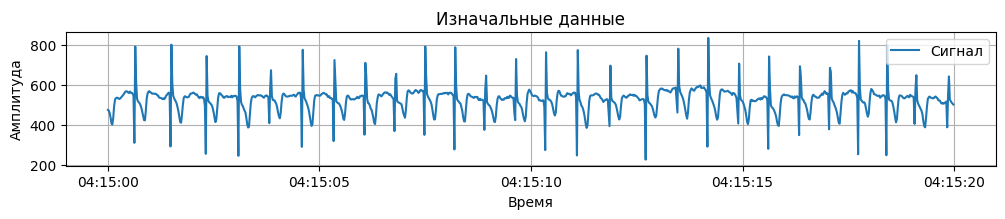

In [21]:
filtered_data = data[(data['Timestamp'] > '2025-05-02 04:15:00') & (data['Timestamp'] < '2025-05-02 04:15:20')]
filtered_data = filtered_data[0::4].reset_index(drop=True) # Сбрасываем индекс

print(filtered_data.shape)

x = filtered_data['Timestamp']
y = filtered_data['COM_Data']

plt.figure(figsize=(12, 8))
plt.subplot(414)
plt.plot(x, y, label="Сигнал")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.title("Изначальные данные")
plt.legend()
plt.grid(True)
plt.show()

# Декомпозиция данных

In [22]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=10)
y = decomposition.resid

# Определение пиков

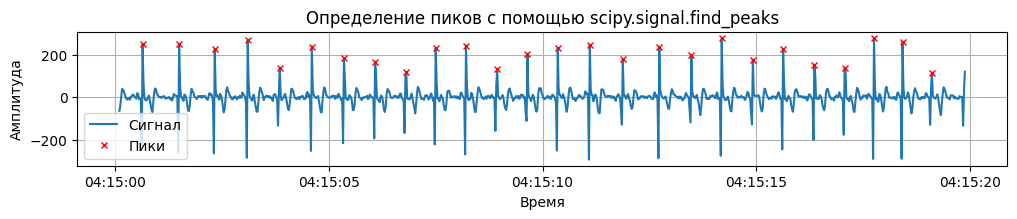

In [23]:
peaks, _ = find_peaks(y, height=80, distance=10, prominence=100)

# Визуализируем результаты
plt.figure(figsize=(12, 8))
plt.subplot(414)
plt.plot(x, y, label="Сигнал")
plt.plot(x[peaks], y[peaks], "x", color='red', label="Пики", markersize=5)
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.title("Определение пиков с помощью scipy.signal.find_peaks")
plt.legend()
plt.grid(True)
plt.show()


# Выявление аномалий

In [ ]:

print(x[peaks])
for i in range(len(x[peaks]) - 1):
    time = pd.to_datetime(x[peaks].values)
    if 0.4 < (time[i + 1] - time[i]).microseconds / 1000000 < 1.5: # от 40 удар/с до 150 удар/с
        pass
    else:
        filtered_data[(filtered_data['Timestamp'] > time[i]) & (filtered_data['Timestamp'] < time[i + 1])] = None
        
    

31    2025-05-02 04:15:00.647
72    2025-05-02 04:15:01.501
112   2025-05-02 04:15:02.334
149   2025-05-02 04:15:03.105
185   2025-05-02 04:15:03.855
221   2025-05-02 04:15:04.605
257   2025-05-02 04:15:05.355
292   2025-05-02 04:15:06.084
327   2025-05-02 04:15:06.814
360   2025-05-02 04:15:07.501
394   2025-05-02 04:15:08.209
429   2025-05-02 04:15:08.939
463   2025-05-02 04:15:09.647
497   2025-05-02 04:15:10.355
533   2025-05-02 04:15:11.105
570   2025-05-02 04:15:11.876
611   2025-05-02 04:15:12.730
647   2025-05-02 04:15:13.480
681   2025-05-02 04:15:14.189
716   2025-05-02 04:15:14.918
750   2025-05-02 04:15:15.626
785   2025-05-02 04:15:16.355
819   2025-05-02 04:15:17.064
852   2025-05-02 04:15:17.751
884   2025-05-02 04:15:18.418
917   2025-05-02 04:15:19.106
Name: Timestamp, dtype: datetime64[ns]
0.854
0.833
0.771
0.75
0.75
0.75
0.729
0.73
0.687
0.708
0.73
0.708
0.708
0.75
0.771
0.854
0.75
0.709
0.729
0.708
0.729
0.709
0.687
0.667
0.688


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383364 entries, 0 to 1383363
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Timestamp  1383364 non-null  datetime64[ns]
 1   COM_Data   1383364 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 21.1 MB


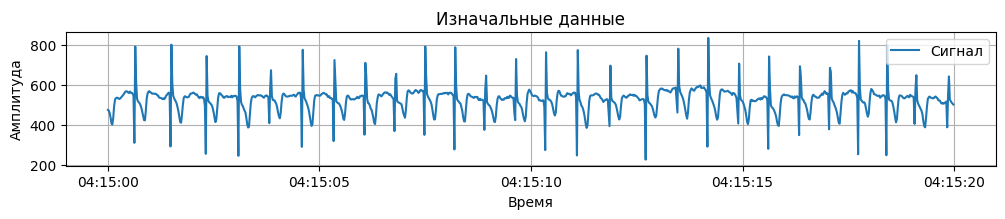

In [26]:
x = filtered_data['Timestamp']
y = filtered_data['COM_Data']

plt.figure(figsize=(12, 8))
plt.subplot(414)
plt.plot(x, y, label="Сигнал")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.title("Изначальные данные")
plt.legend()
plt.grid(True)
plt.show()